# Homework 2 (HW2)

---
By the end of this homework we expect you to be able to:
1. Preprocess data and make it amenable to statistical analysis and machine learning models;
2. Train and test out-of-the-box machine learning models in Python;
3. Carry out statistical hypothesis testing;
4. Carry out simple multivariate regression analyses;
5. Use techniques to control for covariates;
---

## Important Dates

- Homework release: Fri 6 Nov 2020
- **Homework due**: Fri 20 Nov 2020, 23:59
- Grade release: Mon 30 Nov 2020

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
2. Make sure you use the data folder provided in the repository in **read-only** mode.
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (in markdown).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master branch. If there are multiple notebooks present, we will **strictly** not grade anything.
7. Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. Make sure to print results or dataframes that confirm you have properly addressed the task.
9. Lastly, the grading is done in the *double blind* mode, i.e., the TAs grades an anonymized version of your notebook, so make sure that your notebook **neither has your team name nor the names of the members**.

## Context

Publishing papers is a big part of the lives of [Ph.D. students](http://phdcomics.com/comics/archive.php?comicid=154), [post-docs](http://phdcomics.com/comics/archive.php?comicid=1744) and [professors](http://phdcomics.com/comics/archive.php?comicid=1051). 
In Computer Science, publishing happens mostly in conferences. What follows is a slight simplification of how these conferences decide which papers to accept and which papers to reject.
 
Every year, scholars submit papers to prestigious conferences. The papers are then assigned to reviewers (usually around 3), who are other people from the same research community (respect thy neighbor!). Each reviewer weighs in on whether they believe the papers they were assigned are good or bad, and write a review, often along with a score (e.g. +3 Strong Accept, +2 Accept, +1 Weak Accept, 0 Borderline, …,  -3 Strong Reject). Then, in the end, "special" reviewers called, "Area Chairs" analyze all the reviews that were written for the same paper and decide what gets accepted and what gets rejected. Importantly, throughout this whole dance, reviewers and authors are anonymous. When you're reviewing a paper, you do not know who wrote it. And when you receive the review, you don't know who reviewed it. Because of that, we call this a double-blind reviewing process.

An interesting development that has evolved in recent years is the rise of pre-prints. In previous times, researchers often exposed their research to the world only after it had been peer-reviewed and published in a conference or a journal. But recently researchers are much keener to let their ideas out into the world as soon as possible, and they publish their research before it has been approved to any conference or journal, by posting the research on so-called pre-print servers. The most common pre-print server for Computer Science, Physics, and Maths is called [arXiv](https://arxiv.org/), for Biology, an increasingly popular one is [bioRxiv](https://www.biorxiv.org/), for Psychology [psyArXiv](https://psyarxiv.com/) (they are not very creative with the names). Notice that pre-prints and peer-review are not mutually exclusive, in fact, usually, you publish your pre-print, and then you try to publish your work in a peer-reviewed setting.

Overall, publishing pre-prints has many benefits. They make science more accessible and hasten the circulation of important results in the academic community. However, a big issue brought forth with pre-prints is that they often break the anonymity in the double-blind reviewing process. For instance, in machine learning, since most papers are published as pre-prints, it is often easy to figure out if the paper you are reviewing is from a famous researcher or a big company with prominent research scientists. From critics' viewpoint, knowing the authors of the papers you are reviewing can bias your reviews. If you know that a given author is famous, you'd be more inclined to take his or her word for granted. If the author is from an institution you’ve never heard about, you are more likely to doubt his or her findings.

In this homework, we will take a data-driven deep dive into the world of academic publishing. Can you use your freshly acquired data-science skills to predict which papers are going to make the cut? Are your data analysis skills sharp enough to figure out whether the aforementioned concerns about pre-print issues are justified?


## The data

The data, whose source has been *"double-blinded"* from you, and which has been simplified a bit for the assignment, contains information about submissions to a prestigious machine learning conference called ICLR (pronounced “I-clear”). You can find the dataframe in the git repo for the homework (`./data/dataset_final.csv`). We provide a brief description of the fields you will encounter.

- `year`: year the paper has been submitted to ICLR. Notice that we provide data for three years, 2018, 2019, and 2020.


- `paper`: title of the paper.


- `authors`: names of the authors separated by ;.


- `ratings`: mean rating given to the paper by the reviewers.


- `decisions`: either Accept if the paper was accepted, or Reject otherwise.


- `institution`: institutions for each of the authors, separated by ;.


- `csranking`: ranking of the institutions according to csrankings. The better the institution, the better the rank. Notice that, if a paper has more than 1 author, this field will contain multiple values, separated by ;. For institutions that are not in csrankings, the value will be -1.


- `categories`: topical categories of the paper. Each number corresponds to a different category: (1) Theory, (2) Computer Vision, (3) Natural Language Processing, (4) Adversarial ML, (5) Generative Modeling, (7) Fairness, (8) Generalization, (9) Optimization, (10) Graphs, (11) Bayesian Methods, (0) Others. A paper may belong to multiple categories, separated by ;.


- `authors_citations`: number of citations of each one of the authors, separated by ;.


- `authors_publications`: number of publications by each one of the authors, separated by ;.


- `authors_hindex`: h-index of each one of the authors, separated by ;. The h-index is an author-level metric that measures both the productivity and citation impact of the publications of a scientist or scholar. It is the maximum value $h$ such that the given author has published $h$ papers that have each been cited at least $h$ times.


- `arxiv`: whether the paper was spotted in a pre-print server around the submission period.

Also, notice that in this dataframe, when some piece of data was not available, -1 will be used as the value. For example, companies aren't a part of csrankings, so for people who work in big companies, the values are -1 in the field csranking.


## _Step 1:_ Predicting paper ratings

The first part of this homework poses a simple question: Can you predict the ratings the paper will receive given attributes related to its authors? To answer this question, we will build an ML pipeline from scratch, preprocessing the data, training a regression model, and then evaluating it.


---

### Task 1.1

Some of the fields in the data are not very amenable to serve as input to traditional machine learning algorithms. Namely, we have some fields for which there are a varying number of values (e.g. papers with 3 authors will have 3 values in the `author_citations` field, papers with 5 authors will have 5).


Your first task is to perform some feature engineering and derive unique values for each paper which you will be able to use in your ML model. 
More specifically, you must:

1. Create 3 new fields in the dataframe corresponding to the median value of the number of citations per author, the number of publications per author, and the h-index per author. So for instance, for the row `authors_publications`, you will create an additional column, e.g. `authors_publications_median`, containing the median number of publications per author in each paper.
2. Create another field entitled `reputation` capturing how famous the last author of the paper is. Notice that the last author of the paper is usually the most senior person involved in the project. This field should equal $\log_{10}\Big(\frac{\#citations}{\#publications} + 1\Big)$. Notice that each author in the dataset has at least 1 publication, so you don't risk dividing by 0.
3. Create two fields called `has_top_company` and `has_top_institution`. The field `has_top_company` equals 1 if the article contains an author in the following list of companies `["Facebook", "Google", "Microsoft", "Deepmind"]`, and 0 otherwise. The field `has_top_institution` equals 1 if the article contains an author in the top 10 institutions according to CSRankings.
4. **Discuss:** How did you handle -1 values in item 1.1.1? Justify your approach.

---

In [115]:
### Your code here! ###
import pandas as pd
import numpy as np
from difflib import SequenceMatcher

df = pd.read_csv("data\dataset_final.csv")

authors, authors_appearances = np.unique(';'.join(list(df.authors.values)).replace('*','').split(';'), return_counts=True)
df = df.reindex(columns = df.columns.tolist() + ['authors_citations_median', 'authors_publications_median', \
                                                 'authors_hindex_median'])
for row in df.itertuples(index=True):
    row_authors = row.authors.replace('*','').split(';')
    row_authors_citations = np.array(row.authors_citations.split(';')).astype(np.float)
    row_authors_citations = np.delete(row_authors_citations,  np.where(row_authors_citations == -1)) # remove -1 values
    row_authors_publications = np.array(row.authors_publications.split(';')).astype(np.float)
    row_authors_publications = np.delete(row_authors_publications,  np.where(row_authors_publications == -1)) # remove -1 values
    row_authors_h_index = np.array(row.authors_hindex.split(';')).astype(np.float)
    row_authors_h_index = np.delete(row_authors_h_index,  np.where(row_authors_h_index == -1)) # remove -1 values

    if len(row_authors_citations) > 0:
        df.at[row.Index, 'authors_citations_median'] = np.median(row_authors_citations)
    else:
        df.at[row.Index, 'authors_citations_median'] = 0
    if len(row_authors_publications) > 0:
        df.at[row.Index, 'authors_publications_median'] = np.median(row_authors_publications)
    else:
        df.at[row.Index, 'authors_publications_median'] = 1
    if len(row_authors_h_index) > 0:
        df.at[row.Index, 'authors_hindex_median'] = np.median(row_authors_h_index)
    else:
        df.at[row.Index, 'authors_hindex_median'] = 0
        
    
'''authors, authors_appearances = np.unique(';'.join(list(df.authors.values)).replace('*','').split(';'), return_counts=True)
authors_frequencies = dict(zip(authors, authors_appearances)) 
authors_citations_values = {author : [] for author in authors}
authors_publications_values = {author : [] for author in authors}
authors_h_index_values = {author : [] for author in authors}

only_minus_one_authors_citations = set(authors)
only_minus_one_authors_publications = set(authors)
only_minus_one_authors_hindex = set(authors)

for row in df.itertuples(index=True):
    row_authors = row.authors.replace('*','').split(';')
    row_authors_citations = row.authors_citations.split(';')
    row_authors_publications = row.authors_publications.split(';')
    row_authors_h_index = row.authors_hindex.split(';')
    for (i, author) in enumerate(row_authors):
        if i < len(row_authors_citations) and row_authors_citations[i] != '-1':
                if author in only_minus_one_authors_citations:
                    only_minus_one_authors_citations.remove(author)
                authors_citations_values[author].append(row_authors_citations[i])
        if i < len(row_authors_publications) and row_authors_publications[i] != '-1':
            if author in only_minus_one_authors_publications:
                only_minus_one_authors_publications.remove(author)
            authors_publications_values[author].append(row_authors_publications[i])
        if i < len(row_authors_h_index) and row_authors_h_index[i] != '-1':
            if author in only_minus_one_authors_hindex:
                only_minus_one_authors_hindex.remove(author)
            authors_h_index_values[author].append(row_authors_h_index[i])

for author in only_minus_one_authors_citations:
    authors_citations_values[author].append(0)

for author in only_minus_one_authors_publications:
    authors_publications_values[author].append(authors_frequencies[author])

for author in only_minus_one_authors_hindex:
    authors_h_index_values[author].append(0)


df = df.reindex(columns = df.columns.tolist() + ['authors_citations_median', 'authors_publications_median', \
                                                 'authors_hindex_median'])
df = df.astype({'authors_citations_median': str, 'authors_publications_median': str, 'authors_hindex_median': str})             
authors_citations_median = {author: np.median(np.array(values).astype(np.int)).astype(np.int) \
                              for author, values in authors_citations_values.items()}
authors_publications_median = {author: np.median(np.array(values).astype(np.int)).astype(np.int) \
                              for author, values in authors_publications_values.items()}
authors_h_index_values = {author: np.median(np.array(values).astype(np.int)).astype(np.int) \
                              for author, values in authors_h_index_values.items()}
            

for row in df.itertuples(index=True):
    row_authors = row.authors.replace('*','').split(';')
    buffer_citations_medians = []
    buffer_publications_medians = []
    buffer_hindex_medians = []
    
    for (i, author) in enumerate(row_authors):
        buffer_citations_medians.append(str(authors_citations_median[author]))
        buffer_publications_medians.append(str(authors_publications_median[author]))
        buffer_hindex_medians.append(str(authors_h_index_values[author]))
        
    df.at[row.Index, 'authors_citations_median'] = ';'.join(buffer_citations_medians)
    df.at[row.Index, 'authors_publications_median'] = ';'.join(buffer_publications_medians)
    df.at[row.Index, 'authors_hindex_median'] = ';'.join(buffer_hindex_medians)'''
    

df = df.reindex(columns = df.columns.tolist() + ['reputation'])
    
for row in df.itertuples(index=True):
    last_author = row.authors.replace('*','').split(';')[-1]
    last_author_citations = float(row.authors_citations.split(';')[-1])
    last_author_publications = float(row.authors_publications.split(';')[-1])
    df.at[row.Index, 'reputation'] = np.log10((last_author_citations/last_author_publications) + 1)
    


df = df.reindex(columns = df.columns.tolist() + ['has_top_company', 'has_top_institution'])

top_companies = ["Facebook", "Google", "Microsoft", "Deepmind"]
top_institutions = ["Carnegie Mellon University", "Massachusetts Institute of Technology",
                        "University of Illinois at Urbana-Champaign", "Stanford University",
                        "University of California - Berkeley", "University of California - San Diego",
                        "University of Washington", "Cornell University", "University of Michigan",
                        "University of Maryland - College Park"]


'''string_similarity_check = lambda str1, str2, threshold: SequenceMatcher(None, str1, str2).ratio() >= threshold
string_list_similarity_check = lambda str1, list_str, threshold: False if len(list_str) == 0 \
                                                                 else True if string_similarity_check(str1, list_str[0], threshold) else \
                                                                 string_list_similarity_check(str1, list_str[1:], threshold) 
list_list_similarity_check = lambda list_str1, list_str2, threshold: False if len(list_str1) == 0 \
                                                          else True if string_list_similarity_check(list_str1[0], list_str2, threshold) else \
                                                          list_list_similarity_check(list_str1[1:], list_str2, threshold) 

for row in df.itertuples(index=True):
    institutions = list(row.institution.split(';'))  
    df.at[row.Index, 'has_top_company'] = float(list_list_similarity_check(institutions, top_companies, 0.8))
    df.at[row.Index, 'has_top_institution'] = float(list_list_similarity_check(institutions, top_institutions, 0.8))
'''

def process_int_list(s):
    elems = [int(x) for x in s.split(';')]

    # -1 signifies lack of data and it does not signify that the author has the lowest 
    # citation/hindex/publication. Taking -1 at its value can distort the distribution. 
    # That's why we remove it.
    while -1 in elems:
        elems.remove(-1)
    
    return elems

# If the list of top institute is not false, then there is a top institde author 
# CSranking is one-based :( hence (0, 10]
df[f"has_top_institution"] = df.apply(lambda row: 
    1 if [x for x in  process_int_list(row['csranking']) if 0 < x <= 10] else 0,
    axis=1
)

# top companies
top_companies = ["Facebook", "Google", "Microsoft", "Deepmind"]
df[f"has_top_company"] = df.apply(lambda row: 
    1 if [x for x in  row['institution'].split(';') if x in top_companies] else 0,
    axis=1
)

df

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv,authors_citations_median,authors_publications_median,authors_hindex_median,reputation,has_top_company,has_top_institution
0,2018,Certifying Some Distributional Robustness with...,Aman Sinha;Hongseok Namkoong;John Duchi,9.000000,Accept,Stanford University;Stanford University;Stanfo...,4;4;4,4,655;904;12908,42;19;162,8;10;42,True,904.0,42.0,10.0,1.906761,0,1
1,2018,Parametric Information Bottleneck to Optimize ...,Thanh T. Nguyen;Jaesik Choi,4.666667,Reject,Ulsan National Institute of Science and Techno...,468;468,8,1052;727,86;88,16;15,False,889.5,87.0,15.5,0.966675,0,0
2,2018,Towards Neural Phrase-based Machine Translation,Po-Sen Huang;Chong Wang;Sitao Huang;Dengyong Z...,6.666667,Accept,"Microsoft;Google;University of Illinois, Urban...",-1;-1;3;-1;-1,3;2,1718;17889;161;8800;20766,59;1045;17;78;409,17;54;7;33;63,True,8800.0,78.0,33.0,1.714100,1,1
3,2018,Interactive Grounded Language Acquisition and ...,Haonan Yu;Haichao Zhang;Wei Xu,6.333333,Accept,Baidu;Baidu;Baidu,-1;-1;-1,6;8,890;1382;9553,37;63;557,12;20;44,False,1382.0,63.0,20.0,1.258896,0,0
4,2018,A Boo(n) for Evaluating Architecture Performance,Ondrej Bajgar;Rudolf Kadlec;and Jan Kleindienst,4.666667,Reject,;International Business Machines;International...,-1;-1;-1,0,366;678;658,10;40;76,5;11;9,False,658.0,40.0,9.0,0.984882,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4251,2020,A Finite-Time Analysis of Q-Learning with Neu...,Pan Xu;Quanquan Gu,5.000000,Reject,"University of California, Los Angeles;Universi...",20;20,1;9,295;3895,31;174,10;34,False,2095.0,102.5,22.0,1.368938,0,0
4252,2020,SCELMo: Source Code Embeddings from Language M...,Rafael - Michael Karampatsis;Charles Sutton,4.666667,Reject,University of Edinburgh;Google,33;-1,3,0;50,1;18,0;3,False,25.0,9.5,1.5,0.577236,1,0
4253,2020,GraphMix: Regularized Training of Graph Neural...,Vikas Verma;Meng Qu;Alex Lamb;Yoshua Bengio;Ju...,4.000000,Reject,;University of Montreal;University of Montreal...,-1;128;128;128;143;128,10,202;504;2136;208566;3645;346,25;40;22;807;127;94,4;5;8;147;24;8,True,1320.0,67.0,8.0,0.670325,0,0
4254,2020,Neural networks with motivation,Sergey A. Shuvaev;Ngoc B. Tran;Marcus Stephens...,2.333333,Reject,Cold Spring Harbor Laboratory;Cold Spring Harb...,-1;-1;-1;-1;-1,5,16;94;563;997;1816,8;12;14;67;83,3;3;9;9;16,True,563.0,14.0,9.0,1.359447,0,0


Minus one values are ignored when computing the median. Cases where only minus one where present where imputed to 0 for the citations, 1 for the publications and 0 for the 0 for the hindex. This corner case does not seem to happen very often so that a more sophisticated imputation such has regression would not make much difference. One other possibility could have been to remove the row.

### Task 1.2

Now that you have cleaned up your data, your next task is to divide your data into a training set and a testing set. You should do this in two ways:

1. First, do it randomly. Split the data into a training set (70%) and a testing set (30%). We refer to these as "random split" in the subsequent tasks.
2. Second, do it longitudinally. Use the data from 2018 and 2019 for the training set, and the data from 2020 as the testing set. We refer to these as "longitudinal split" in the subsequent tasks.


In [120]:
from sklearn.model_selection import train_test_split

df_train_random, df_test_random = train_test_split(df, test_size=0.3, shuffle=True, random_state=42)

print(f"Random split: train({len(df_train_random)}), test({len(df_test_random)})")

df_train_date = df.loc[(df.year == 2018) | (df.year == 2019)]
df_test_date = df.loc[df.year == 2020]

print(f"Longitudinal split: train({len(df_train_date)}), test({len(df_test_date)})")

Random split: train(2979), test(1277)
Longitudinal split: train(2204), test(2052)


### Task 1.3

Build a Linear Regression model (use [sklearn](https://scikit-learn.org/stable/)) that predicts the score of a paper (which is in the variable ratings in the dataframe). Train it and test it using the split you previously defined. Your model should use as features:
- Median values for the number of author citations, publications and h-indexes, as calculated in Task 1.1.1.

- `reputation` of the last author, as calculated in Task 1.1.2.

For the two scenarios above (random split and longitudinal split):

1. Report the model $R^2$ in each case (for the testing set).
2. **Discuss:** Hypothesize a reason why the results are different. Additionally, interpret the $R^2$ value for the longitudinal split. How can it be negative?
3. **From now onwards (in this task and the following ones), consider only the random split.** For a given entry $X$ your model outputs a predicted score $Y'$. The difference between the real score $Y$ and the predicted score $Y'$ is called the "residual". Plot the distribution of your residuals for the test set. Using this distribution, estimate what is the probability that your prediction is off by more than 2-points? Provide bootstrapped confidence intervals for your answer.
4. **Discuss:** Identify three additional features that are already computed in your dataframe and that could boost your model's predictive performance. You are not allowed to use the variable `decisions` as an input here. Before running any experiments, discuss why each of these features might add valuable information to your model.
5. Report the $R^2$ (for the test set) for a newly trained model with these additional features. Please note that you do not need to improve the model performance to be successful in this task!

**Hint**: [Metrics!](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)

In [129]:
# R squared

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predictive_features = ['authors_citations_median', 'authors_publications_median', 'authors_hindex_median', 'reputation']
predicted_feature = ['ratings']

reg_random = LinearRegression().fit(df_train_random[predictive_features], df_train_random[predicted_feature])
y_pred_random = reg_random.predict(df_test_random[predictive_features])

print("R2 score with random split: {:.2f}".format(r2_score(df_test_random[predicted_feature], y_pred_random)))
print("Mean squared error with random split: {:.2f}".format(mean_squared_error(df_test_random[predicted_feature], y_pred_random)))

reg_date = LinearRegression().fit(df_train_date[predictive_features], df_train_date[predicted_feature])
y_pred_date = reg_date.predict(df_test_date[predictive_features])

print("R2 score with date split: {:.2f}".format(r2_score(df_test_date[predicted_feature], y_pred_date)))
print("Mean squared error with random split: {:.2f}".format(mean_squared_error(df_test_date[predicted_feature], y_pred_date)))

R2 score with random split: 0.11
Mean squared error with random split: 2.00
R2 score with date split: -0.24
Mean squared error with random split: 3.14


R score is not negative. There must be an issue. Maybe it is related to the previous point (missing values imputation). 

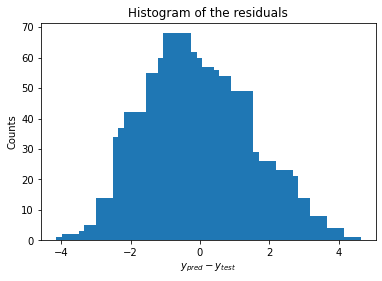

Boostraped estimate of the probability of 'residuals lower than 2':
   Probability with 95% confidence interval [0.1417 ; 0.1832] and median 0.1621


In [136]:
# Distribution of residuals



def bootstrap(*arrs, random_state):
    indices = np.array(range(arrs[0].shape[0]))
    bootstraped_indices = random_state.choice(indices, arrs[0].shape[0])
    
    if isinstance(arrs[0], (pd.core.series.Series, pd.DataFrame)):
        if len(arrs[0].shape) == 2:
            return (arr.iloc[bootstraped_indices, :] for arr in arrs)
        else:
            return (arr.iloc[bootstraped_indices] for arr in arrs)
        
    elif isinstance(arrs[0], np.ndarray):
        if len(arrs[0].shape) == 2:
            return (arr[bootstraped_indices, :] for arr in arrs)
        else:
            return (arr[bootstraped_indices] for arr in arrs)
        

def bootstrap_prob_residual(X, y, n_bootstraps, residuals_larger_than, test_size=0.3, alpha_confidence=0.05, random_seed=0):
    random_state = np.random.RandomState(random_seed)
    
    probabilities = []
    for i in range(n_bootstraps):
        (bootstraped_X, bootstraped_y) = bootstrap(X, y, random_state=random_state)
        bootstraped_X_train, bootstraped_X_test, bootstraped_y_train, bootstraped_y_test = \
        train_test_split(bootstraped_X, bootstraped_y, test_size=0.3, shuffle=True, random_state=random_seed+i)

        reg = LinearRegression().fit(bootstraped_X_train, bootstraped_y_train)
        y_pred = reg.predict(bootstraped_X_test)
        residuals = y_pred - bootstraped_y_test
        probabilities.append(np.sum(np.abs(residuals) > residuals_larger_than)/len(residuals))
        
    lower_quantile = np.percentile(probabilities, 100*(alpha_confidence/2))
    median = np.percentile(probabilities, 50)
    higher_quantile = np.percentile(probabilities, 100*(1-alpha_confidence/2))
        
    return lower_quantile, median, higher_quantile


residuals = y_pred_random - df_test_random[predicted_feature].values

hist, bins = np.histogram(residuals, bins=50)
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center')
plt.title("Histogram of the residuals")
plt.xlabel("$y_{pred}-y_{test}$")
plt.ylabel("Counts")
plt.show()

n_bootstraps = 1000
test_size = 0.3
lower_quantile, median, higher_quantile = bootstrap_prob_residual(df[predictive_features], df[predicted_feature], n_bootstraps, residuals_larger_than=2, test_size=0.3, alpha_confidence=0.05, random_seed=0)

print("Boostraped estimate of the probability of 'residuals larger than 2':")
print("   Probability with 95% confidence interval [{:.4f} ; {:.4f}] and median {:.4f}".format(lower_quantile, higher_quantile, median))

    


- The arxiv boolean variable could help predicting the ratings. Indeed, authors publishing their paper on this platform before submitting have a chance to get opinions and advises. These might lead to modifications that could help the paper getting a better rate.
- The booleans has_top_institution and has_top_company could help as well. Even though, the reviewers should not be aware of these. The authors of the rated paper do not belong to a top institution/company for no reason. It is reasonable to expect them to produce good content and ready to be published content since they should have experience.


In [137]:
# Let's add these variables

# We transform "arxiv" into a numeric variable
df["arxiv"] = df["arxiv"].astype(int)
predictive_features = ['authors_citations_median', 'authors_publications_median', 'authors_hindex_median', 'reputation', 
                        "arxiv", "has_top_institution", "has_top_company"]
predicted_feature = ['ratings']

reg_random = LinearRegression().fit(df_train_random[predictive_features], df_train_random[predicted_feature])
y_pred_random = reg_random.predict(df_test_random[predictive_features])

print("R2 score with random split: {:.2f}".format(r2_score(df_test_random[predicted_feature], y_pred_random)))
print("Mean squared error with random split: {:.2f}".format(mean_squared_error(df_test_random[predicted_feature], y_pred_random)))


lower_quantile, median, higher_quantile = bootstrap_prob_residual(df[predictive_features], df[predicted_feature], n_bootstraps, residuals_larger_than=2, test_size=0.3, alpha_confidence=0.05, random_seed=0)

print("Boostraped estimate of the probability of 'residuals lower than 2':")
print("   Probability with 95% confidence interval [{:.4f} ; {:.4f}] and median {:.4f}".format(lower_quantile, higher_quantile, median))


R2 score with random split: 0.14
Mean squared error with random split: 1.95
Boostraped estimate of the probability of 'residuals lower than 2':
   Probability with 95% confidence interval [0.1378 ; 0.1801] and median 0.1582


There is a slight improvement in all metrics. The distribution of residuals looks less scattered.

### Task 1.4

Experiment with training a different regressor, a [Gradient Boosting Regressor](https://scikit-learn.org/stable/modules/ensemble.html?highlight=xgboost#gradient-boosting). This regressor is analogous to the Gradient Boosting Classifier that you have seen in class. This model performs extremely well for a variety of tasks and is often used in machine learning competitions for tabular data (e.g., on [Kaggle](www.kaggle.com)). You must:

1. Train a Gradient Boosting Regressor without specifying any parameters, e.g. `GradientBoostingRegressor().fit(X, y)`, and report its $R^2$ on the testing set. Your model should again use as features:
    - Median values for the number of author citations, publications and h-indexes as calculated in Task 1.1.1.
    - `reputation` of the last author, as calculated in Task 1.1.2.
2. Create an additional feature called $crazy$, which is derived as follows. If the score  of the paper, $ratings$, is bigger than 4.96, then $crazy = 9 - ratings$, otherwise, $crazy = - ratings$. Train a Gradient Boosting Regressor to predict paper scores using only $crazy$ as a feature. Additionally, train a Linear Regression model to predict paper scores using only $crazy$ as a feature. Report the $R^2$ in the testing set.
3. **Discuss:** Why does the Gradient Boosting Regressor perform so much better?

In [138]:
from sklearn.ensemble import GradientBoostingRegressor

predictive_features = ['authors_citations_median', 'authors_publications_median', 'authors_hindex_median', 'reputation']
predicted_feature = ['ratings']

grad_reg = GradientBoostingRegressor(n_estimators=50, learning_rate=0.01).fit(df_train_random[predictive_features], df_train_random[predicted_feature].values.ravel())

y_pred_random = grad_reg.predict(df_test_random[predictive_features])

print("R2 score with random split: {:.2f}".format(r2_score(df_test_random[predicted_feature], y_pred_random)))
print("Mean squared error with random split: {:.2f}".format(mean_squared_error(df_test_random[predicted_feature], y_pred_random)))



R2 score with random split: 0.07
Mean squared error with random split: 2.10


In [140]:
# "Crazy" feature

df = df.reindex(columns = df.columns.tolist() + ['crazy'])

for row in df.itertuples(index=True):
    if row.ratings > 4.96:
        df.at[row.Index, 'crazy'] = 9 - row.ratings
    else:
        df.at[row.Index, 'crazy'] = - row.ratings
        

In [141]:
df_train_random, df_test_random = train_test_split(df, test_size=0.3, shuffle=True, random_state=42)

predictive_features = ['crazy']

grad_reg = GradientBoostingRegressor().fit(df_train_random[predictive_features], df_train_random[predicted_feature].values.ravel())

y_pred_random_grad = grad_reg.predict(df_test_random[predictive_features])

print("R2 score with random split: {:.2f}".format(r2_score(df_test_random[predicted_feature], y_pred_random_grad)))
print("Mean squared error with random split: {:.2f}".format(mean_squared_error(df_test_random[predicted_feature], y_pred_random_grad)))

reg_random = LinearRegression().fit(df_train_random[predictive_features], df_train_random[predicted_feature])
y_pred_random_lin = reg_random.predict(df_test_random[predictive_features])

print("R2 score with random split: {:.2f}".format(r2_score(df_test_random[predicted_feature], y_pred_random_lin)))
print("Mean squared error with random split: {:.2f}".format(mean_squared_error(df_test_random[predicted_feature], y_pred_random_lin)))



R2 score with random split: 1.00
Mean squared error with random split: 0.00
R2 score with random split: 0.41
Mean squared error with random split: 1.33


As can be seen below, gradient boosting succeeds because it is able to perform non-linear mappings as neccessary. On the left chart, the
relation to model is shown. On the middle and right chart, one can observe the models obtain from gradient tree boosting
and linear regression. Clearly, the linear model fails to capture the non-linear patern.

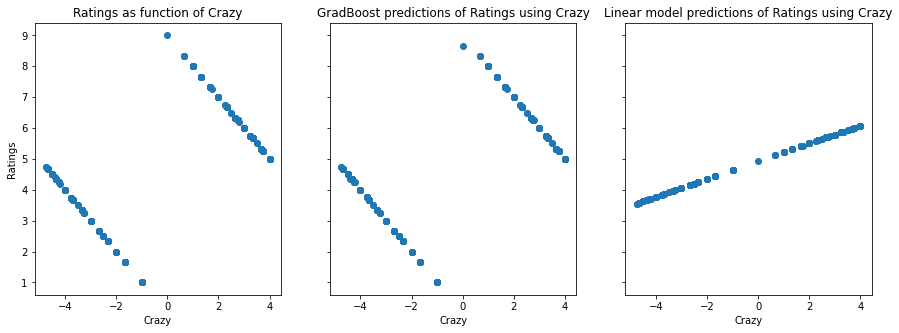

In [142]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5), sharey='row')
ax1.set_title("Ratings as function of Crazy")
ax2.set_title("GradBoost predictions of Ratings using Crazy")
ax3.set_title("Linear model predictions of Ratings using Crazy")
ax1.set_ylabel("Ratings")
ax1.set_xlabel("Crazy")
ax2.set_xlabel("Crazy")
ax3.set_xlabel("Crazy")
ax1.scatter(df_test_random.crazy, df_test_random.ratings)
ax2.scatter(df_test_random.crazy, y_pred_random_grad)
ax3.scatter(df_test_random.crazy, y_pred_random_lin)

plt.show()

### Task 1.5

Complex models often have several hyper-parameters. 
To obtain the best results, it is common-place to use a cross-validation set-up in your training data to find the best hyper-parameters, and then use it for the test set.


1. Write modular code (i.e., a function) to divide your training data into $N$ folds and perform cross-validation.
2.  Experiment tuning two hyper-parameters of the Gradient Boosting Regressor: `n_estimators` and `learning_rate`.
For each possible combination of the two hyper-parameters (see below for the range of values that you should try for each hyper-parameter), train your model in a cross-validation setup with $N$=20. Report the mean $R^2$ along with the 90% CI for the 18 scenarios. Notice that you can calculate the 90% CI in a bootstrap-like fashion.
    - `n_estimators`$ \in  \{ 50, 75, 100, 150, 200, 250\}$
    - `learning_rate`$ \in  \{ 0.1, 0.05, 0.01\}$.
3. With the best hyper-parameters obtained, train your model with the entire training set and report the $R^2$ on the testing set.
4. **Discuss:** Why don't we tune the hyper-parameters in the testing set instead of doing cross-validation in the training set?

In [152]:
from sklearn.model_selection import KFold

def cross_validator(X, y, n_folds, model, alpha_confidence=0.10, random_state=0, n_bootstraps_estimate=100):
    kf = KFold(n_splits=n_folds, random_state=random_state, shuffle=True)
    
    y_preds = []
    y_trues = []
    r2_scores = []
    for train_index, test_index in kf.split(X, y):
        X_train = X.iloc[train_index, :].values
        y_train = y.iloc[train_index, :].values.ravel()
        X_test = X.iloc[test_index, :].values
        y_test = y.iloc[test_index, :].values.ravel()
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2_scores.append(r2_score(y_test, y_pred))
        
    random_gn = np.random.RandomState(random_state)
    means = []
    r2_scores = np.array(r2_scores)
    
    for i in range(n_bootstraps_estimate):
        (bootstraped_r2_scores,) = bootstrap(r2_scores, random_state=random_gn)
        means.append(np.mean(bootstraped_r2_scores))
        
    lower_quantile = np.percentile(means, 100*(alpha_confidence/2))
    higher_quantile = np.percentile(means, 100*(1-alpha_confidence/2))
    mean = np.mean(r2_scores)
    
    return {"r2_lower_quantile": lower_quantile, "r2_higher_quantile": higher_quantile, "r2_mean": mean}
        
# cross_validator: a cross validation function
# model_class: a model constructor
# parameters: parameter names and ranges
# test all combinaisons and record the metrics returned by cross_validator
def parameters_cross_evaluator(cross_validator, model_class, parameters):
    n_parameters = len(parameters.keys())
    
    range_sizes = {k: len(v) for k, v in parameters.items()}
    range_indices = {k: 0 for k in parameters}
    parameter_keys = list(parameters.keys())
    cum_prod = lambda numbers: 1 if len(numbers) == 0 else numbers[0] * cum_prod(numbers[1:])
    number_combinaisons = cum_prod(list(range_sizes.values()))
    
    parameters_performances_combinaisons = []
    for n in range(number_combinaisons):
        parameters_combinaison = {k: parameters[k][range_indices[k]] for k in parameters}
        range_indices[parameter_keys[0]] += 1
        i = 0
        done = False
        while not done and i < n_parameters-1:
            if range_indices[parameter_keys[i]] == range_sizes[parameter_keys[i]]:
                range_indices[parameter_keys[i]] = 0
                range_indices[parameter_keys[i+1]] += 1
                i += 1
            else:
                done = True
        model = model_class(**parameters_combinaison)
        results = cross_validator(model)
        parameters_performances_combinaisons.append({'parameters': parameters_combinaison, 'performances': results})
        print("Combinaisons: {}/{}".format(n+1, number_combinaisons))
                                                     
    return parameters_performances_combinaisons

class LoadedGradBoost:
    def __init__(self, n_estimators, learning_rate):
        self.model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate)
        
    def fit(self, X, y):
        self.model.fit(X, y)
        
        return self
    
    def predict(self, X):
        return self.model.predict(X)
    
df_train_random, df_test_random = train_test_split(df, test_size=0.3, shuffle=True, random_state=42)

loaded_cross_validator = lambda model: cross_validator(X=df_train_random[predictive_features], 
                                                        y=df_train_random[predicted_feature],
                                                        n_folds=20,
                                                        model=model,
                                                        random_state=0,
                                                        n_bootstraps_estimate=250)
    
predictive_features = ['authors_citations_median', 'authors_publications_median', 'authors_hindex_median', 'reputation']
predicted_feature = ['ratings']
parameters_performances_combinaisons = parameters_cross_evaluator(loaded_cross_validator, LoadedGradBoost, {'n_estimators': [50, 75, 100, 150, 200, 250],
                                                          'learning_rate': [0.1, 0.05, 0.01]})
    

Combinaisons: 1/18
Combinaisons: 2/18
Combinaisons: 3/18
Combinaisons: 4/18
Combinaisons: 5/18
Combinaisons: 6/18
Combinaisons: 7/18
Combinaisons: 8/18
Combinaisons: 9/18
Combinaisons: 10/18
Combinaisons: 11/18
Combinaisons: 12/18
Combinaisons: 13/18
Combinaisons: 14/18
Combinaisons: 15/18
Combinaisons: 16/18
Combinaisons: 17/18
Combinaisons: 18/18


In [153]:
def best_parameters_combinaison(parameters_performances_combinaisons):
    best_parameters = None
    largest_r2_mean = -np.inf
    for combinaison in parameters_performances_combinaisons:
        if combinaison['performances']['r2_mean'] > largest_r2_mean:
            largest_r2_mean = combinaison['performances']['r2_mean']
            best_parameters = combinaison['parameters']

    return best_parameters

best_parameters = best_parameters_combinaison(parameters_performances_combinaisons)
print("Best paramers: {}".format(best_parameters))
best_parameters = best_parameters_combinaison(parameters_performances_combinaisons)
best_params_model = LoadedGradBoost(**best_parameters).fit(X=df_train_random[predictive_features],
                                                           y=df_train_random[predicted_feature].values.ravel())
y_pred_best_params = best_params_model.predict(df_test_random[predictive_features])

print("R2 score with best params: {:.2f}".format(r2_score(df_test_random[predicted_feature], y_pred_best_params)))
print("Mean squared error with random split: {:.2f}".format(mean_squared_error(df_test_random[predicted_feature], y_pred_best_params)))


Best paramers: {'n_estimators': 50, 'learning_rate': 0.05}
R2 score with best params: 0.12
Mean squared error with random split: 1.98


Cross-validation on the training set and then evaluation on the test set is intended to avoid "leakage". Tuning on the test set could
have been possible if an additional (non-intersecting) evaluation set was available. Cross-validation mimics this inside the
training-set where several sub-train set and sub-test set are made. Hence, the test set is an evaluation set.

## _Step 2:_ What influences papers getting accepted?

Time to change hats!

If before we were interested in creating an accurate regressor, now we are interested in understanding what increases the chance of papers getting accepted. 

Typically, in that scenario, simpler models with a clear statistical interpretation (e.g. logistic regression) yield more interesting insights.

For the analysis in this and the next step, you should use [statsmodels](https://www.statsmodels.org/) (for the regressions) and [scipy](https://www.scipy.org/) (for the statistical hypothesis testing).


### Task 2.1

Let's warm up with some visualizations and some hypothesis testing!

1. Plot the distributions of 1) ratings of papers that got accepted in 2020, 2) ratings of papers that got rejected in 2020.
2. Select a statistical test to compare whether the mean for ratings of papers that got accepted in 2020 is significantly higher.
3. **Discuss:** Justify why the statistical test you selected is appropriate. Interpret the test-related statistic and its p-value: concretely, what do they mean?

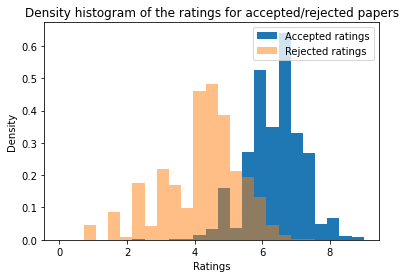

In [154]:
accepted_ratings = df.ratings.loc[df.decisions == 'Accept']
rejected_ratings = df.ratings.loc[df.decisions == 'Reject']


_, bins, _ = plt.hist(accepted_ratings, bins=25, range=[0, 9], label="Accepted ratings", density=True)
_ = plt.hist(rejected_ratings, bins=bins, alpha=0.5, label="Rejected ratings", density=True)

plt.legend(loc='upper right')
plt.title("Density histogram of the ratings for accepted/rejected papers")
plt.xlabel("Ratings")
plt.ylabel("Density")
plt.show()

### Difference between the two groups

Let's study the difference between the mean of the two groups. A t-test requires the normality assumption which we need to check before everything.

In [229]:
from scipy import stats

print(stats.normaltest(accepted_ratings))
print(stats.normaltest(rejected_ratings))
print(stats.shapiro(accepted_ratings))
print(stats.shapiro(rejected_ratings))

NormaltestResult(statistic=65.31923029571487, pvalue=6.54801039524873e-15)
NormaltestResult(statistic=103.5348259277187, pvalue=3.2938074490877515e-23)
ShapiroResult(statistic=0.9683775901794434, pvalue=2.3755101871473407e-17)
ShapiroResult(statistic=0.9695207476615906, pvalue=6.400637919107352e-24)


Both D’Agostino's and Shapiro's normality test reject the normality of both groups. Thus a t-test does not seem appropriate. The Mann whitney U test is non-parametric. However, it tests the discrepancy between the medians and not the means. Since both groups seem to be pretty symetrical we can convince ourselves that, to some extent, the result will be transferable to the mean.

In [231]:
print(stats.mannwhitneyu(accepted_ratings, rejected_ratings))

MannwhitneyuResult(statistic=209528.0, pvalue=0.0)


The p-value is below both 0.05 and 0.025 such that we reject the null hypothesis. Hence, the medians are statistically different.

### Task 2.2

We will now carry out a logistic regression modeling the binary variable `decisions` as a function of the continuous variable `ratings` and an intercept. 

Recall that a logistic regression is a model in the form:

$$
\log \Big( \frac{p}{1-p} \Big) = b_0 + b_1x_1 + b_2x_2 + \ldots
$$

Where $p$ is the probability of the dependent variable (here, `decisions`) being equals to 1. 
Note that $\frac{p}{1-p}$ represents the odds of the variable, and thus, on the left-hand side we have the log-odds of the variable.
This can be also written as:

$$
\Big( \frac{p}{1-p} \Big) = e^{b_0 + b_1 x_1 + b_2 x_2 + \ldots} =  e^{b_0} e^{b_1 x_1} e^{b_2 x_2} \ldots
$$

Given a linear variable, say $x_1$, if we increase the value associated with this variable by a single unit, and keep everything constant, we have:

$$
 e^{b_1(x_1+1)} =  e^{b_1 x_1 + b_1} = e^{b_1 x_1}e^{b_1}  
$$

This means that we multiply the odds of the outcome variable by $e^{b_1}$. Thus, let's say that $x_1$ is the average rating, and $\beta_1$ is the associated coefficient. Also, let's assume that $\beta_1$ equals 2. In that case, increasing the score of the paper by 1 unit is equivalent to multiplying both sides of the previous equation by $e^{b_1}$. The original equation for our model becomes:

$$
\Big( \frac{p}{1-p} \Big) = e^{b_0} e^{b_1 x_1} 
$$
$$
\Big( \frac{p}{1-p} \Big) e^{b_1}  = e^{b_0} e^{b_1 x_1} e^{b_1}
$$

Since $b_1=2$, we have that this is the same as multiplying the odds of the variable by $e^2\approx7$. 
So for example, if a paper with a score 5 had $p=0.05$ of being approved, its odds would be $0.05/0.95\approx0.052$. According to our model, an increase in 1-rating point would mean that the new odds would be $0.052*7\approx0.36$. Using the odds formula  ($\frac{p}{1-p}$), this suggests that this paper would have a chance of $0.56$ of being accepted.

---

This is the theory. Now, let's find out what the real world looks like.


1. Fit a logistic regression model to our data considering as the training set all papers submitted in 2020. Your model should predict a binary variable related to decisions (which equals true if the paper was accepted and false otherwise) as a function of the paper ratings and an intercept. In mathematical notation:
$$
d = b_0 + r b_1
$$
Where $d$ is the binary variable corresponding to a decision, $r$ is a numeric variable corresponding to the rating a paper has received and $b$ are coefficients.
Notice that here we have no testing set!
Report the summary of your model. 
2. **Discuss:** Interpreting the coefficients of your model, calculate the probability that a paper with a score 7 will be accepted.



In [157]:
import statsmodels.api as sm 

df_2020 = df.loc[df.year == 2020]

ratings = df_2020.ratings.values
accepted = (df_2020.decisions == "Accept").values.astype(float)

exog = sm.add_constant(ratings) # add a constant variable (to get an intercept)
log_reg = sm.Logit(accepted, exog)

print(log_reg.fit().summary())

Optimization terminated successfully.
         Current function value: 0.251882
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2052
Model:                          Logit   Df Residuals:                     2050
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                  0.5913
Time:                        12:42:20   Log-Likelihood:                -516.86
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.8811      0.597    -21.574      0.000     -14.051     -11.711
x1             2.3672      0.

The intercept is -12.88 meaning that if the rating is equal to 0, we model $\frac{p}{1-p}$ as $e^{-12.88}$. Hence $p=\frac{e^{-12.88}}{e^{-12.88}+1} \approx 0$ in that case. The coefficient corresponding to the rating is 2.36. This coefficient is positive so that an increase in the ratings implies an increase in the odds and thus the probability to be accepted. For the probability to be equal to $\frac{1}{2}$, the rating must be equal to $-\frac{b_0}{b_1} = 5.44$ which is the modeled classification threshold. A rating below is this value is modeled to have a probability of acceptance that is below $\frac{1}{2}$. A paper with rating equal to 7 would have a modeled odds of acceptance of $e^{b_0}e^{b_1 x}=e^{-12.88}e^{2.36*7}=38.09$ and then a probability of 0.974.

### Task 2.3

Our model is not so interesting since the only independent variable (that is, our model' feature or predictor) is something blatantly associated with paper acceptance. Let's go further! 

1. Run a logistic regression with the binary decision as the dependent variable (the outcome) and using as independent variables (the features): ratings, the reputation of the last author, and whether the paper was on arxiv or not. That is, in [patsy-style formula](https://patsy.readthedocs.io/en/latest/formulas.html): `decisions ~ ratings + reputation + arxiv` (variable names do not need to be exactly these). Consider all papers submitted in 2020 as your training data.
Notice that reputation was calculated in Task 1.1. 
2. **Discuss:** Unlike `ratings` and `reputation`, the variable `arxiv` is binary. Following the same logic as we did for continuous variables in the text of Task 2.2, interpret the meaning of this coefficient. What happens to the odds ratio if the paper was seen in arxiv? Is this effect statistically significant?

In [159]:
df_2020 = df.loc[df.year == 2020]
accepted = (df_2020.decisions == "Accept").values.astype(float)

exog_variables = ["ratings", "reputation", "arxiv"]

exog = sm.add_constant(df_2020[exog_variables]) # add a constant variable (to get an intercept)

log_reg = sm.Logit(accepted, exog)

print(log_reg.fit().summary())


Optimization terminated successfully.
         Current function value: 0.250440
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2052
Model:                          Logit   Df Residuals:                     2048
Method:                           MLE   Df Model:                            3
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                  0.5936
Time:                        12:47:49   Log-Likelihood:                -513.90
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.2261      0.634    -20.873      0.000     -14.468     -11.984
ratings        2.3541      0.

In the case of binary variables as arxiv, the interpretation as "the variable increase by 1" says it all. If the coefficient on "arxiv" is $b_0$ then, being preprinted increase the odds by a factor of $e^{b_0}$. However, in this case the interpretation is much less clear. Indeed, p-values associated to the coefficients of "reputation" and "arxiv" are above 0.05. Both intervals (on the right) suggest that the coefficients could even be negative. The mentionned coefficients are positive so that an increase in "reputation" or "arxiv" (going from 0 to 1) would increase the probability of acceptance. However, the coefficients do not settle on clear values, so does the interpretation. As before, the coefficient of "ratings" is positive with confidence so that an increase in the ratings leads to a modeled increase in the probability of acceptance.

### Task 2.4

Let's finally move on to the question that you have been dying to answer: Do pre-prints favor top institutions? 

In order to (try to) answer that question, you must fit yet another logistic regression.

Your regression should have the paper decision as the dependent variable, and `ratings`, `reputation`, and `arxiv` as independent variables just like in task 2.3. Yet, here, include also as independent variables the binary variable `has_top_institution`, which equals 1 if the paper has an author in a top-10 institution; and the interaction variable `arxiv:has_top_institution`, which equals one only if the paper is from a top-10 institution **and** if it appeared on arxiv before the submission deadline. In patsy-style formula your model should look something like: 

`decisions_bool ~ ratings + reputation + arxiv + has_top_institution + arxiv:has_top_institution`


1. Fit this model and estimate the effect of posting on arxiv for a top institution. Again, consider only papers submitted in the 2020 edition.
2. **Discuss:** Interpreting the p-values, discuss: is this evidence that arxiv breaks double-blind submissions?

In [160]:
df_2020 = df.loc[df.year == 2020]
accepted = (df_2020.decisions == "Accept").values.astype(float)

exog_variables = ["ratings", "reputation", "arxiv", "has_top_institution"] 
arxiv_has_top_institution = (df_2020.arxiv == 1).astype(bool) & (df_2020.has_top_institution == 1).astype(bool)
arxiv_has_top_institution = arxiv_has_top_institution.astype(int)
exog = pd.concat([df_2020[exog_variables], pd.DataFrame({'arxiv:has_top_institution': arxiv_has_top_institution})], axis=1)
exog = sm.add_constant(exog) # add a constant variable (to get an intercept)

log_reg = sm.Logit(accepted, exog)

print(log_reg.fit().summary())

Optimization terminated successfully.
         Current function value: 0.247320
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2052
Model:                          Logit   Df Residuals:                     2046
Method:                           MLE   Df Model:                            5
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                  0.5987
Time:                        12:49:13   Log-Likelihood:                -507.50
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -13.3940      0.647    -20.717      0.000     -14.

As before, some p-values are above 0.05. This is the case of the coefficients of "reputation", "arxiv", and "has_top_institution". This coefficients are clearly unsettled has can be seen on the intervals on the right. As before, the coefficients can be negative so that interpretation can be completely flipped. These coefficients are inconclusive. This applies for the newly added variable "arxiv:has_top_institution" as well.

Not true anymore
'''However, the newly added variable arxiv:has_top_institution has a p-value below 0.05. The interval suggest a positive effect of widly varying magnitude but positive anyway. Hence, the model suggest that paper with at least one author from a top academy and which were previously published on arxiv are more likely to be accepted. This could suggest that papers from well-known and experience authors published on arxiv might have been seen by the reviewer. Hence, it could have influenced their perception of the work. This is interesting because individually, "arxiv" and "has_top_institution" have unclear effect on the likelihood of acceptance but combined, the effect is neat. If the inital modeled probability of acceptance was 0.05, the odds would be $\approx 0.052$. Letting a paper moving from "not published on arxiv and has no author from a top institution" to "published on arxiv and has at last one author from a top institution" implies multiplying the odds by $e^{1.05} \approx 2.85$ to $0.1482$. Thus the modeled probability of acceptance would move from 0.05 to 0.13. Below we show the impact of that change of situation from any original probabiliy of acceptance. With the suggested coefficient, the impact is noticeable.'''

Changing the situation on arxiv:has_top_institution can change a probability of 0.05 to 0.13


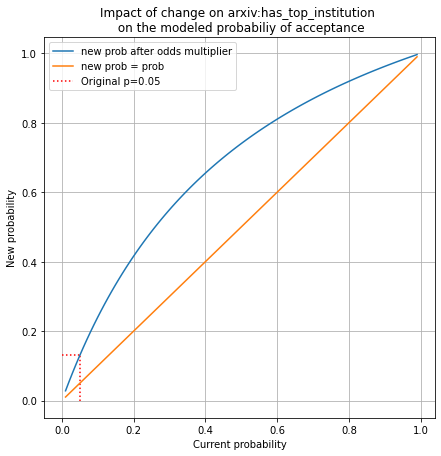

In [18]:
def new_probability(probability, odds_multiplier):
    odds = probability/(1-probability)
    new_odds = odds * odds_multiplier
    return new_odds/(new_odds+1)

print("Changing the situation on arxiv:has_top_institution can change a probability of 0.05 to {:.2f}".format(new_probability(0.05, 2.85)))

probabilities = np.linspace(0.01,0.99,100)
new_probabilities = [new_probability(prob, 2.85) for prob in probabilities]
plt.figure(figsize=(7,7))
plt.plot(probabilities, new_probabilities, label="new prob after odds multiplier")
plt.plot(probabilities, probabilities, label="new prob = prob")
plt.title("Impact of change on arxiv:has_top_institution \n on the modeled probabiliy of acceptance")
plt.xlabel("Current probability")
plt.ylabel("New probability")
plt.hlines(0.1304, 0, 0.05, linestyle='dotted', color="red", label="Original p=0.05")
plt.vlines(0.05, 0, 0.1304, linestyle='dotted', color="red")
plt.legend(loc="upper left")

plt.grid()
plt.show()

## Step 3: Matching

Okay, so let's change hats one last time.

As you have all seen in class, a particularly powerful way of disentangling causal effects from observational data is through matching: making sure we are not comparing apples to oranges.


### Task 3.1

One of the ways to do matching is called "Propensity Score Matching." There, we calculate a *propensity score* for each subject which represents the propensity to receive a "treatment." Then, we match subjects who received and did not receive the treatment, but that had similar propensity scores (that is, even though some received the treatment and some did not, they had similar chances to receive it).

In our specific case, we can further attempt to study the impact of pre-prints by considering publishing to arxiv as our "treatment".

In that context, the first step to perform propensity score matching is to create a classifier that predicts whether a paper was published on arxiv or not.

1. We have trained this classifier for you (don't get spoiled!). You may load the pandas dataframe entitled `propensity_scores.csv.gz` from the github repo. 
Notice that we will be using only the articles published in 2020. 
Create a new dataframe that is a merged version of this new dataframe with the dataframe you have been working on so far. Remember to keep only the papers published in 2020!
2. **Discuss:** In which way is this classifier (that is a classifier trained to estimate propensity scores) different from the previous classifier that you trained in Step 1?

**Hint:** For a classifier tra we don't need a training set and a test set!


In [76]:
df_propensity_scores = pd.read_csv('data\propensity_scores.csv.gz', compression='gzip', error_bad_lines=False)
df_2020 = df.loc[df.year == 2020]
df_merged = pd.merge(df_2020,df_propensity_scores,on='paper')


In the case of the propensity score, the classifier is just used to output a score which will not be thresholded. Furthermore, it will only be used as a "compressor" reducing the explanatory variable to a score. There is not need for out-of-sample performance analysis. (Not sure about that).

### Task 3.2

Now is time to match users! You will be implementing a technique called *caliper matching*. 

Create pairs of users as follows. For each treated subject (here a paper that was submitted to arxiv), find a non-treated subject (a paper that was not submitted to arxiv) with similar propensity score. Namely, if the propensity score of the treated unit is $p_t$, you must find a non-treated unit $p_c$ with propensity score $|p_{c} - p_t| < \epsilon$. If there is no such a non-treated unit, you may ignore the treated unit and move forward with the matching. Notice that your output must be a 1-to-1 matching. So each paper can only be matched once.

1. Perform this matching procedure using $\epsilon = 0.05$.
2. Report how many pairs did you manage to match? How many didn't you?

In [218]:
import random

def matcher(df, matching_variable, n_trials, epsilon, random_seed=0, silent=True):
    random_state = random.Random(random_seed)
    
    trials = [] # pair of score and matchings
    for trial in range(n_trials):
        if silent is False:
            print("Trial {}/{}".format(trial+1, n_trials), end='\n' if n_trials - trial == 1 else '\r')
        remaining_indices = list(df.index)
        remaining_indices_preprinted = list(df.index[df[matching_variable] == 1])
        remaining_indices_not_preprinted = list(df.index[df[matching_variable] == 0])
        
        random_state.shuffle(remaining_indices)
        random_state.shuffle(remaining_indices_preprinted)
        random_state.shuffle(remaining_indices_not_preprinted)

        matchings = []
        indice = remaining_indices[0]
        done = False
        while done is False:
            if silent is False and indice % 200 == 0 and indice != 0:
                print("Indice {}/{}".format(indice, df.shape[0]))

            preprinted = df[matching_variable].iloc[indice] == 1
            if preprinted:
                look_up_indices = remaining_indices_not_preprinted
                original_indices = remaining_indices_preprinted
                
            else:
                look_up_indices = remaining_indices_preprinted
                original_indices = remaining_indices_not_preprinted


            indice_propensity = df.propensity_score.iloc[indice]
            for remaining_indice in look_up_indices:
                remaining_indice_propensity = df.propensity_score.iloc[remaining_indice]
                if np.abs(indice_propensity - remaining_indice_propensity) < epsilon:

                    if preprinted:
                        matchings.append((indice, remaining_indice))
                    else:
                        matchings.append((remaining_indice, indice))

                    original_indices.remove(indice)
                    look_up_indices.remove(remaining_indice)
                    remaining_indices.remove(indice)
                    remaining_indices.remove(remaining_indice)
                    break

            indice += 1

            while indice not in remaining_indices:
                if indice == df.shape[0]:
                    done = True
                    break 

                indice += 1
                
        score = 0
        for match in matchings:
            prop1 = df.propensity_score.iloc[match[0]]
            prop2 = df.propensity_score.iloc[match[1]]
            score += np.abs(prop1-prop2)
            
        
        max_num_pairs = np.min([np.sum(df[matching_variable]), len(df.arxiv) - np.sum(df_merged[matching_variable])])
        missings_pairs = max_num_pairs - len(matchings)
        score += missings_pairs
        trials.append({"matchings": matchings, "score": score})

    
    min_score = np.inf
    best_matchings = None
    for trial in trials:
        if trial["score"] < min_score:
            min_score = trial["score"]
            best_matchings = trial["matchings"]
            
    return best_matchings, min_score


best_matching, best_score = matcher(df_merged, "arxiv", n_trials=1, epsilon=0.05)

matchings = best_matching
print("Best (or not if only one trial) score: {:.2f}".format(best_score))

Best (or not if only one trial) score: 37.69


In [26]:
print("Pairs: {}".format(len(matchings)))
print("There were {} pre-printed papers, and {} non pre-printed papers. Thus, the maximum number of pairs is {}.".format(np.sum(df_merged.arxiv),
                                                                                                                       len(df_merged.arxiv) - np.sum(df_merged.arxiv),
                                                                                                                       np.min([np.sum(df_merged.arxiv), len(df_merged.arxiv) - np.sum(df_merged.arxiv)])))


Pairs: 590
There were 590 pre-printed papers, and 1462 non pre-printed papers. Thus, the maximum number of pairs is 590.


### Task 3.3

Let's evaluate your matching! There are more rigorous ways to do it, but we'll go the easy path.


1. Using one or several appropriate plot types, visualize the distributions of the variables reputation and ratings, for treated and non-treated subjects that you matched.
2. Visualize the distributions of these variables for all papers from 2020 that appeared on arxiv, and all papers that did not (including those you did not manage to match).
3. **Discuss:** According to your visual analysis (no statistical tests needed here), did the matching do a good job at balancing covariates?

Correlation coefficient between paired reputations 0.534
Correlation coefficient between paired ratings 0.488


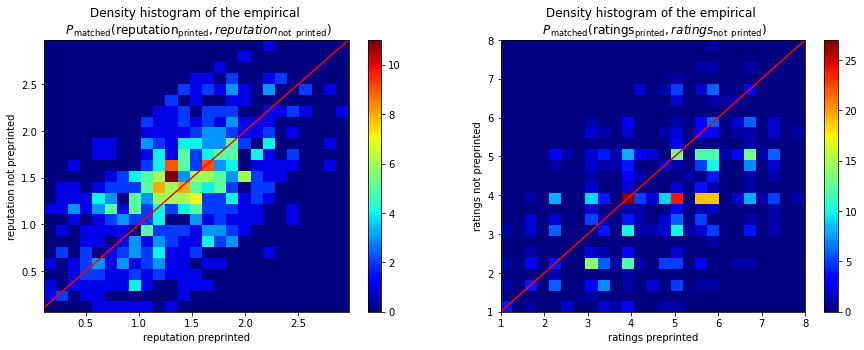

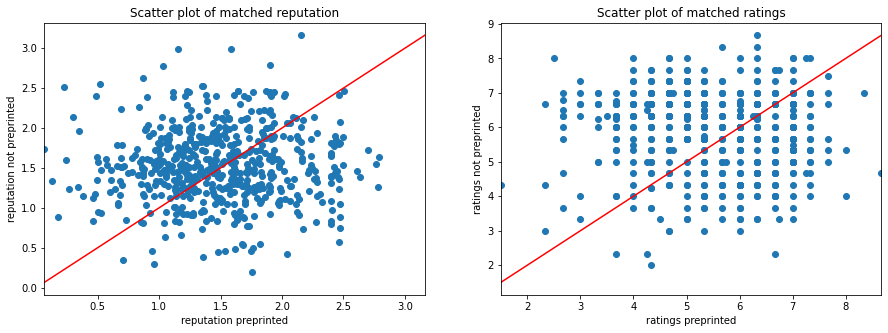

In [200]:
def paired_histogram(df, matchings, covariate, fig, ax):
    covariate_preprinted = [df[covariate].iloc[match[0]] for match in matchings]
    covariate_not_preprinted = [df[covariate].iloc[match[1]] for match in matchings]

    min_scale = np.min([np.min(covariate_preprinted), np.min(covariate_not_preprinted)])
    max_scale = np.min([np.max(covariate_preprinted), np.max(covariate_not_preprinted)])
    
    hist = ax.hist2d(covariate_preprinted, covariate_not_preprinted, bins=(25, 25), cmap=plt.cm.jet)

    ax.set_title("Density histogram of the empirical \n $P_{\mathrm{matched}}(\mathrm{%s}_{\mathrm{printed}},{%s}_{\mathrm{not\;\;printed}})$" % (covariate, covariate))
    ax.set_xlabel("{} preprinted".format(covariate))
    ax.set_ylabel("{} not preprinted".format(covariate))
    ax.plot(np.linspace(min_scale, max_scale, 100), np.linspace(min_scale, max_scale, 100), color="red")
    fig.colorbar(hist[3], ax=ax)
    

def paired_scatter(df, matchings, covariate, fig, ax):
    covariate_preprinted = [df[covariate].iloc[match[0]] for match in matchings]
    covariate_not_preprinted = [df[covariate].iloc[match[1]] for match in matchings]

    min_scale = np.min([np.min(covariate_preprinted), np.min(covariate_not_preprinted)])
    max_scale = np.min([np.max(covariate_preprinted), np.max(covariate_not_preprinted)])
    
    ax.scatter(covariate_preprinted, covariate_not_preprinted)
    ax.set_title("Scatter plot of matched {}".format(covariate))
    ax.set_xlabel("{} preprinted".format(covariate))
    ax.set_ylabel("{} not preprinted".format(covariate))
    ax.plot(np.linspace(min_scale, max_scale, 100), np.linspace(min_scale, max_scale, 100), color="red")
    ax.set_xlim((min_scale, max_scale))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

paired_histogram(df_merged, matchings, "reputation", fig, ax1)
paired_histogram(df_merged, matchings, "ratings", fig, ax2)

fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(15,5))

paired_scatter(df, matchings, "reputation", fig, ax3)
paired_scatter(df, matchings, "ratings", fig, ax4)


paired_reputations = np.array([[df_merged.reputation.iloc[match[0]], df_merged.reputation.iloc[match[1]]] for match in matchings])
corrcoef = np.corrcoef(paired_reputations.transpose())[0, 1]
print("Correlation coefficient between paired reputations {:.3f}".format(corrcoef))

paired_ratings = np.array([[df_merged.ratings.iloc[match[0]], df_merged.ratings.iloc[match[1]]] for match in matchings])
corrcoef = np.corrcoef(paired_ratings.transpose())[0, 1]
print("Correlation coefficient between paired ratings {:.3f}".format(corrcoef))

### Observations
The method appears to balance reputation and ratings in average as can be seen on the y=x lines. The linear correlation are near 0.5 which is a descent correlation. The 2d histogram suggest that it is likely to observe matchings with close/balanced covariates.

## More trials

We may wonder if any improvement could be observe the the covariate balancing if we picked a "better" matching. Let's study this idea.

Trial 100/100
Best (or not if only one trial) score: 18.27
Correlation coefficient between paired reputations 0.559
Correlation coefficient between paired ratings 0.440


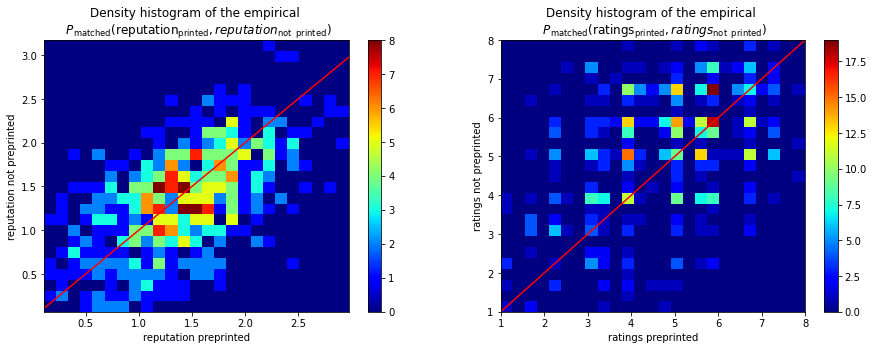

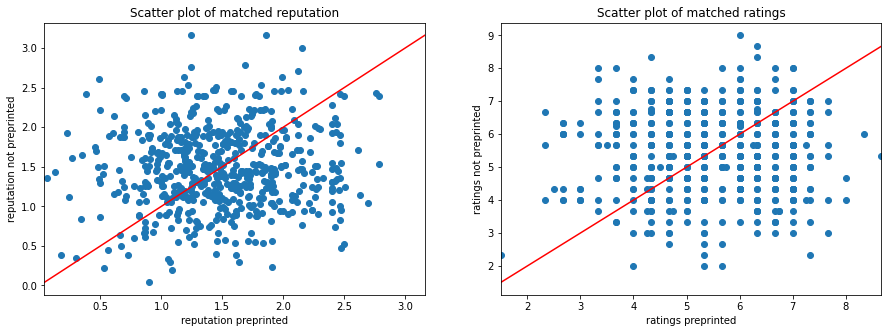

In [202]:
best_matching, best_score = matcher(df_merged, "arxiv", n_trials=100, epsilon=0.05)

better_matchings = best_matching
print("Best (or not if only one trial) score: {:.2f}".format(best_score))
fig3, (ax5, ax6) = plt.subplots(1, 2, figsize=(15,5))

paired_histogram(df_merged, better_matchings, "reputation", fig3, ax5)
paired_histogram(df_merged, better_matchings, "ratings", fig3, ax6)

fig4, (ax7, ax8) = plt.subplots(1, 2, figsize=(15,5))

paired_scatter(df, better_matchings, "reputation", fig4, ax7)
paired_scatter(df, better_matchings, "ratings", fig4, ax8)

paired_reputations = np.array([[df_merged.reputation.iloc[match[0]], df_merged.reputation.iloc[match[1]]] for match in better_matchings])
corrcoef = np.corrcoef(paired_reputations.transpose())[0, 1]
print("Correlation coefficient between paired reputations {:.3f}".format(corrcoef))

paired_ratings = np.array([[df_merged.ratings.iloc[match[0]], df_merged.ratings.iloc[match[1]]] for match in better_matchings])
corrcoef = np.corrcoef(paired_ratings.transpose())[0, 1]
print("Correlation coefficient between paired ratings {:.3f}".format(corrcoef))

The matching is improved with respect to our metric. However, the improvement in the covariate balancing does not seem significant. The correlation scores are very similar, so are the charts. 

### Task 3.4

Finally, it's time to estimate the treatment effect. Given that we have pairs of matched samples, one that received treatment and one that did not, and that they have associated outcomes $y_{treat}$ and $y_{\neg treat}$. We can calculate the average treatment effect as:

$$
ATE = \frac{1}{N} \sum_i^N  y_{treat}^{(i)} - y_{\neg treat}^{(i)}
$$

Notice that here the outcome is a simple binary variable which equals 1 if the paper has been accepted and equals 0 if the paper has been rejected, and $N$ is the total number of matched samples in our analysis.

According to your matched sample, estimate the treatment effect of publishing a paper on arxiv. Report the 95% CI through bootstrapping.


In [223]:
def boostrap_estimate_effect(df, alpha_confidence=0.05, n_bootstraps=100, n_trials_matching=1, random_seed=0):
    effects = np.zeros(n_bootstraps)
    accepted = (df.decisions == "Accept").values.astype(int)
    random_state = np.random.RandomState(random_seed)
    for n in range(n_bootstraps):
        print("Bootstrap {}/{}".format(n+1, n_bootstraps), end='\n' if n_bootstraps - n == 1 else '\r')
        (bootstraped_df, ) = bootstrap(df, random_state=random_state)
        bootstraped_df.reset_index(drop=True, inplace=True)
        best_matchings, best_score = matcher(bootstraped_df, "arxiv", n_trials=n_trials_matching, epsilon=0.05, silent=True)

        effect = 0
        for match in best_matchings:
            effect = accepted[match[0]] - accepted[match[1]]
            
        effects[n] = effect / len(best_matchings)
    
    
    lower_percentiles = np.percentile(effects, 100*(alpha_confidence/2))
    higher_percentiles = np.percentile(effects, 100*(1-alpha_confidence/2))
    median = np.percentile(effects, 50)
    
    return lower_percentiles, median, higher_percentiles
    

lower_q_one_trial, median_one_trial, higher_q_one_trial = boostrap_estimate_effect(df_merged, alpha_confidence=0.05, n_bootstraps=100, n_trials_matching=1, random_seed=0)

print("One trial for the matchings:")
print("    Median: {:.3f} ; 95% CI: [{} - {}]".format(median_one_trial, lower_q_one_trial, higher_q_one_trial))




Bootstrap 100/100
One trial for the matchings:
    Median: 0.000 ; 95% CI: [-0.0016738607970779038 - 0.0017879390980998504]


As can be seen on the boostraped results above, the effect seems to be null. The median bootstraped effect is near zero. The confidence interval is symetric around zero. This somewhat agrees with previous results using logistic regression. Indeed, the effect of the treatment (pre-publishing on arxiv) seems null.

In [224]:
lower_q_many_trials, median_many_trials, higher_q_many_trials = boostrap_estimate_effect(df_merged, alpha_confidence=0.05, n_bootstraps=100, n_trials_matching=50, random_seed=0)

print("Fifty trial for the matchings:")
print("    Median: {:.3f} ; 95% CI: [{} - {}]".format(median_many_trials, lower_q_many_trials, higher_q_many_trials))

Bootstrap 100/100
Fifty trial for the matchings:
    Median: 0.000 ; 95% CI: [-0.0016658208259842256 - 0.0017924588900308323]


It seems that improving the matchings does not lead to a different conclusion. The observations are exactly equivalent: the arxiv publication does not seem to have any effect on the fact that the paper will be accepted or not.

### Task 3.5

Wait, but what about prestigious institutions? 

1.  To understand what is going on there, repeat tasks 3.2 to 3.4 considering *only* the top 10 institutions. Notice that you can use the same propensity scores and re-do the steps in a reduced dataframe containing only top-institutions.
2. **Discuss:** Is this evidence that arxiv breaks double-blind submissions?

In [225]:
df_merged_top_institutions = df_merged.loc[df_merged.has_top_institution == 1]
df_merged_top_institutions.reset_index(drop=True, inplace=True)

best_matching, best_score = matcher(df_merged_top_institutions, "arxiv", n_trials=1, epsilon=0.05)

matchings = best_matching
print("Best (or not if only one trial) score: {:.2f}".format(best_score))

print("Pairs: {}".format(len(matchings)))
print("There were {} pre-printed papers, and {} non pre-printed papers. Thus, the maximum number of pairs is {}.".format(np.sum(df_merged_top_institutions.arxiv),
                                                                                                                       len(df_merged_top_institutions.arxiv) - np.sum(df_merged_top_institutions.arxiv),
                                                                                                                       np.min([np.sum(df_merged_top_institutions.arxiv), len(df_merged_top_institutions.arxiv) - np.sum(df_merged_top_institutions.arxiv)])))




Best (or not if only one trial) score: -151.32
Pairs: 117
There were 168 pre-printed papers, and 384 non pre-printed papers. Thus, the maximum number of pairs is 168.


In this case, one trial of the matcher does not lead to the maximum number of pairs possible. As seen before improving the score did not lead to different conclusions. However, one could increase the number of observations by 40%. The conclusion would be stronger with more samples. Let's test the matching with more trials.

In [226]:
best_matching, best_score = matcher(df_merged_top_institutions, "arxiv", n_trials=100, epsilon=0.05)

matchings = best_matching
print("Best (or not if only one trial) score: {:.2f}".format(best_score))

print("Pairs: {}".format(len(matchings)))
print("There were {} pre-printed papers, and {} non pre-printed papers. Thus, the maximum number of pairs is {}.".format(np.sum(df_merged_top_institutions.arxiv),
                                                                                                                       len(df_merged_top_institutions.arxiv) - np.sum(df_merged_top_institutions.arxiv),
                                                                                                                       np.min([np.sum(df_merged_top_institutions.arxiv), len(df_merged_top_institutions.arxiv) - np.sum(df_merged_top_institutions.arxiv)])))


Best (or not if only one trial) score: -201.65
Pairs: 168
There were 168 pre-printed papers, and 384 non pre-printed papers. Thus, the maximum number of pairs is 168.


It seems we were able to reach the maximum number of pairs as we wanted.

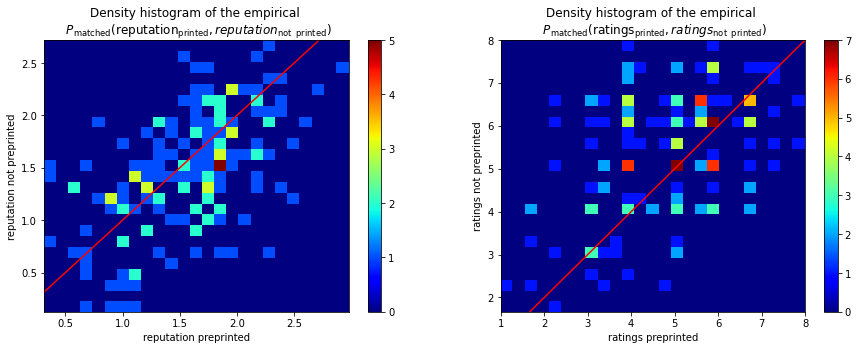

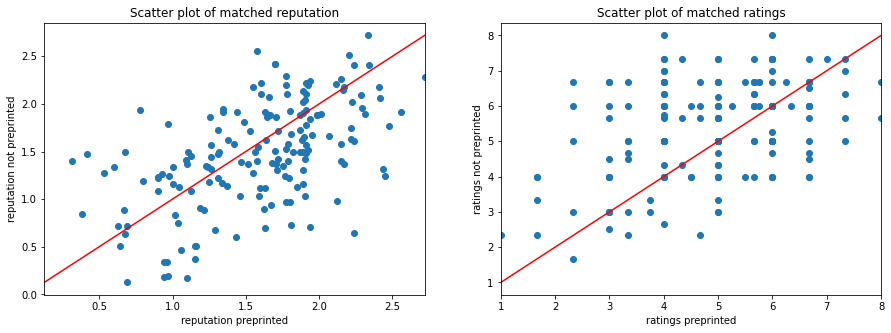

In [227]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

paired_histogram(df_merged_top_institutions, matchings, "reputation", fig, ax1)
paired_histogram(df_merged_top_institutions, matchings, "ratings", fig, ax2)

fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(15,5))

paired_scatter(df_merged_top_institutions, matchings, "reputation", fig, ax3)
paired_scatter(df_merged_top_institutions, matchings, "ratings", fig, ax4)

In [228]:
paired_reputations = np.array([[df_merged_top_institutions.reputation.iloc[match[0]], df_merged_top_institutions.reputation.iloc[match[1]]] for match in matchings])
corrcoef = np.corrcoef(paired_reputations.transpose())[0, 1]
print("Correlation coefficient between paired reputations {:.3f}".format(corrcoef))

paired_ratings = np.array([[df_merged_top_institutions.ratings.iloc[match[0]], df_merged_top_institutions.ratings.iloc[match[1]]] for match in matchings])
corrcoef = np.corrcoef(paired_ratings.transpose())[0, 1]
print("Correlation coefficient between paired ratings {:.3f}".format(corrcoef))

lower_q_one_trial, median_one_trial, higher_q_one_trial = boostrap_estimate_effect(df_merged_top_institutions, alpha_confidence=0.05, n_bootstraps=100, n_trials_matching=1, random_seed=0)

print("One trial for the matchings:")
print("    Median: {:.3f} ; 95% CI: [{} - {}]".format(median_one_trial, lower_q_one_trial, higher_q_one_trial))

Correlation coefficient between paired reputations 0.558
Correlation coefficient between paired ratings 0.408
Bootstrap 100/100
One trial for the matchings:
    Median: 0.000 ; 95% CI: [-0.0042 - 0.008440749181028342]


As before, the effect of the treatment, even for prestigious institution does not seem to have any effect on the chance of a paper to get accepted.